# COVID-19 Global Data Tracker

This notebook analyzes global COVID-19 trends using data from Our World in Data. It includes case counts, deaths, vaccinations, and comparisons across countries over time.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('ggplot')

In [9]:
df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [17]:
# 🔍 Inspect Data
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 non-null  float64      

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

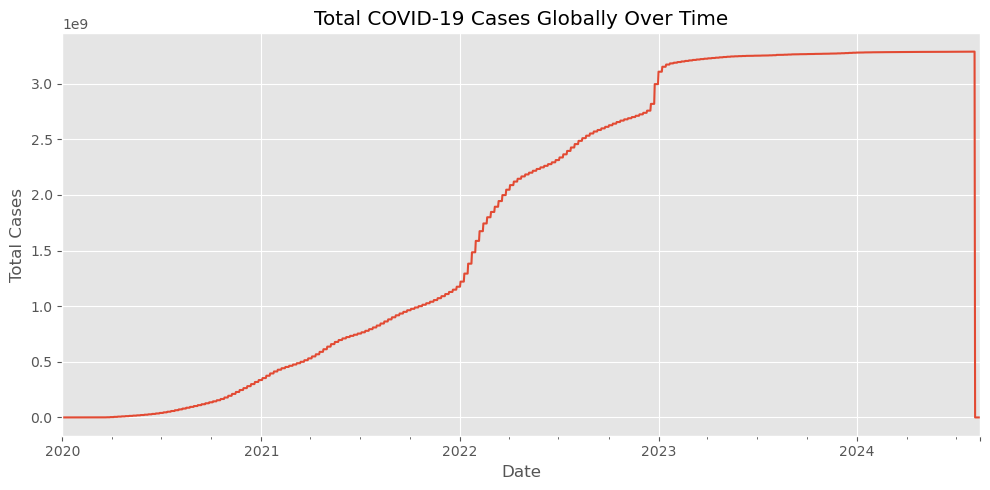

In [19]:
# 📈 Global Total Cases Over Time
global_cases = df.groupby('date')['total_cases'].sum()

plt.figure(figsize=(10,5))
global_cases.plot()
plt.title('Total COVID-19 Cases Globally Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

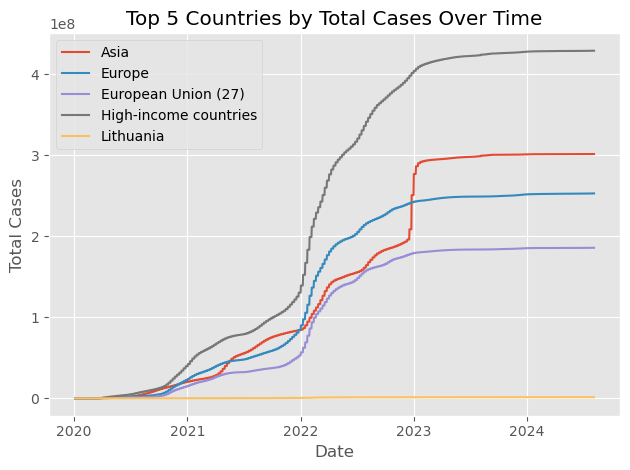

In [21]:
# 🌍 Compare Top 5 Countries by Total Cases
latest_date = df['date'].max()
top_countries = df[df['date'] == latest_date].groupby('location')['total_cases'].sum().nlargest(5).index

for country in top_countries:
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Top 5 Countries by Total Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

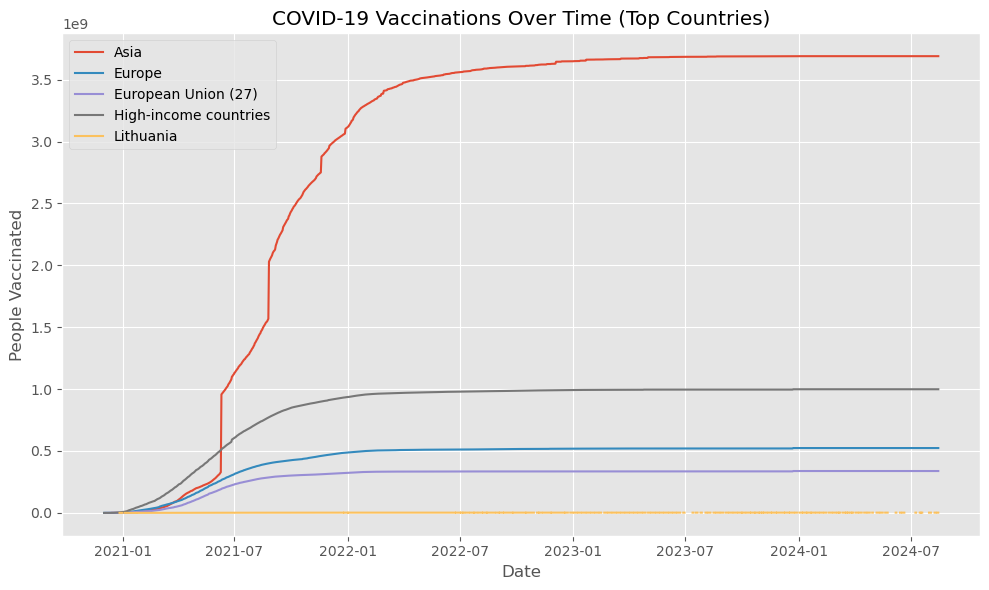

In [23]:
# 💉 Vaccination Trend Example
df_vax = df[df['location'].isin(top_countries)]
plt.figure(figsize=(10,6))

for country in top_countries:
    c_data = df_vax[df_vax['location'] == country]
    plt.plot(c_data['date'], c_data['people_vaccinated'], label=country)

plt.title('COVID-19 Vaccinations Over Time (Top Countries)')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.legend()
plt.tight_layout()
plt.show()

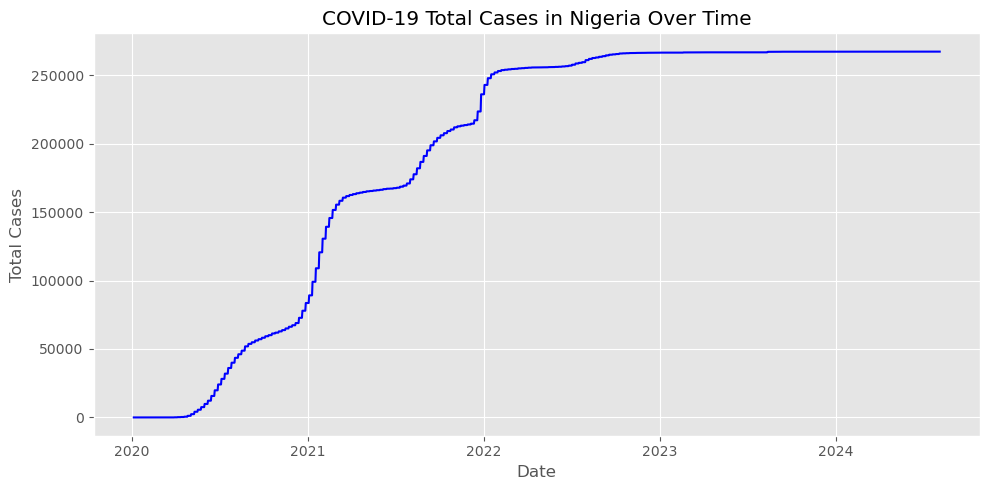

In [41]:
# 📊 Plot total COVID-19 cases in Nigeria
plt.figure(figsize=(10,5))
plt.plot(nigeria_data['date'], nigeria_data['total_cases'], color='blue')
plt.title('COVID-19 Total Cases in Nigeria Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.tight_layout()
plt.show()

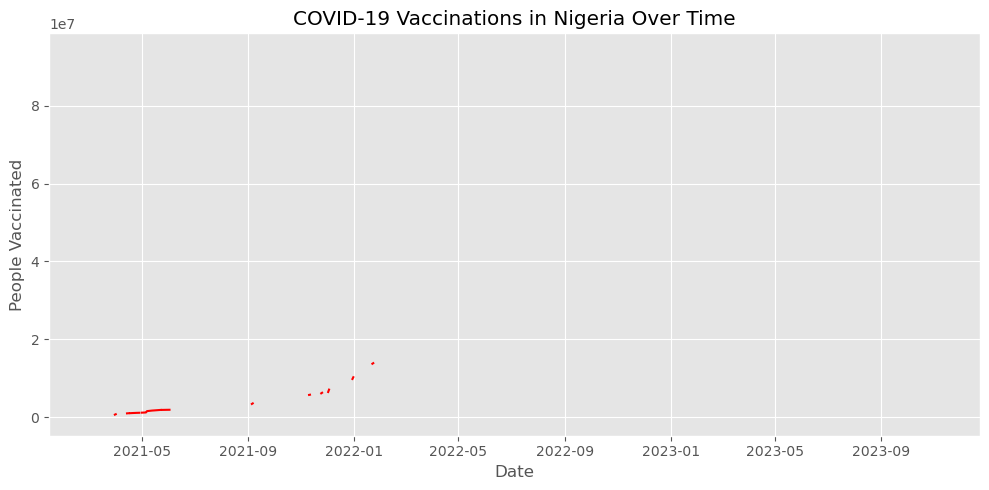

In [48]:
# 💉 Plot total people vaccinated in Nigeria
plt.figure(figsize=(10,5))
plt.plot(nigeria_data['date'], nigeria_data['people_vaccinated'], color='red')
plt.title('COVID-19 Vaccinations in Nigeria Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')
plt.tight_layout()
plt.show()